# MIDS W261 HW10



## HW 10.0: Short answer questions

### What is Apache Spark and how is it different to Apache Hadoop? 

Apache Spark is an optimized engine that supports general execution graphs over an RDD, or Resilient Distributed Data objects. Spark is 100x faster than Hadoop in memory and 10x faster on disk. It also requires 2-5 times less code to execute the same job than Hadoop.

### Fill in the blanks:
#### Spark API consists of interfaces to develop applications based on it in Java, ...... languages (list languages). 

Java, Scala, Python, and R

#### Using Spark, resource management can be done either in a single server instance or using a framework such as Mesos or ????? in a distributed manner.

Mesos and YARN are the resource managers usually used with Spark

#### What is an RDD and show a fun example of creating one and bringing the first element back to the driver program.

An RDD is a Resilient Distributed Data object. RDDs support transformations and actions. An example of creating an RDD is:

    # set up the reading of CSV data from a file
    dataRDD = sc.textFile('data.csv')  
    
    # convert each line into a data point
    arrayRDD = dataRDD.map(lambda line: [float(v) for v in line.split(',')]) 
    
    # bring the first data point of the array back to the driver
    print "First data point is: ", arrayRDD.take(1)   
    
    

#### What is lazy evaluation and give an intuitive example of lazy evaluation and comment on the massive computational savings to be had from lazy evaluation.

Lazy evaluation is the concept that something isn't computed until it's required. RDD transformations are lazily evaluated and are not realized until an action requires them to be. An example of lazy evaluation is reading data from disk or a database. The code describes the read of the data from the device or database, but the actual act of reading the data doesn't happen when that code is encountered in the execution flow of the program. Instead the data is read when some action is requested that requires the data at that time.

## HW 10.1: 

**In Spark write the code to count how often each word appears in a text document (or set of documents). Please use this homework document as a the example document to run an experiment.  Report the following: provide a sorted list of tokens in decreasing order of frequency of occurrence.**

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
text_file = sc.textFile("MIDS-MLS-HW-10.txt")
counts = text_file.flatMap(lambda line: line.split(" ")) \
             .map(lambda word: (word, 1)) \
             .reduceByKey(lambda a, b: a + b) \
             .map(lambda (x,y): (y,x)) \
             .sortByKey(False)

counts.collect()

[(108, u''),
 (46, u'the'),
 (23, u'and'),
 (18, u'in'),
 (17, u'of'),
 (12, u'a'),
 (11, u'for'),
 (9, u'code'),
 (9, u'to'),
 (8, u'is'),
 (8, u'='),
 (8, u'data'),
 (7, u'#'),
 (7, u'with'),
 (7, u'this'),
 (7, u'Using'),
 (7, u'your'),
 (7, u'on'),
 (6, u'==='),
 (6, u'HW'),
 (6, u'KMeans'),
 (5, u'from'),
 (5, u'as'),
 (4, u'What'),
 (4, u'Sum'),
 (4, u'Comment'),
 (4, u'Squared'),
 (4, u'==HW'),
 (4, u'each'),
 (4, u'linear'),
 (4, u'example'),
 (4, u'clusters'),
 (4, u'Set'),
 (3, u'words'),
 (3, u'Spark'),
 (3, u'+'),
 (3, u'available'),
 (3, u'lazy'),
 (3, u'100'),
 (3, u'training'),
 (3, u'count'),
 (3, u'Please'),
 (3, u'following'),
 (3, u'report'),
 (3, u'model'),
 (3, u'Errors'),
 (3, u'results'),
 (3, u'using'),
 (3, u'Within'),
 (3, u'===HW'),
 (3, u'it'),
 (3, u'import'),
 (3, u'after'),
 (3, u'plot'),
 (3, u'an'),
 (3, u'regression'),
 (3, u'document'),
 (3, u'provided'),
 (3, u'x'),
 (2, u'-----------------------'),
 (2, u'homework'),
 (2, u'notebook:'),
 (2, u'(one'

## HW 10.1.1

**Modify the above word count code to count words that begin with lower case letters (a-z) and report your findings. Again sort the output words in decreasing order of frequency.**

In [3]:
import re
text_file = sc.textFile("MIDS-MLS-HW-10.txt")
counts = text_file.flatMap(lambda line: line.split(" ")) \
             .filter(lambda token: re.match(r'^[a-z]+', token)) \
             .map(lambda word: (word, 1)) \
             .reduceByKey(lambda a, b: a + b) \
             .map(lambda (x,y): (y,x)) \
             .sortByKey(False)

counts.collect()

[(46, u'the'),
 (23, u'and'),
 (18, u'in'),
 (17, u'of'),
 (12, u'a'),
 (11, u'for'),
 (9, u'code'),
 (9, u'to'),
 (8, u'is'),
 (8, u'data'),
 (7, u'with'),
 (7, u'this'),
 (7, u'on'),
 (7, u'your'),
 (5, u'from'),
 (5, u'as'),
 (4, u'clusters'),
 (4, u'each'),
 (4, u'linear'),
 (4, u'example'),
 (3, u'count'),
 (3, u'words'),
 (3, u'report'),
 (3, u'available'),
 (3, u'lazy'),
 (3, u'following'),
 (3, u'training'),
 (3, u'model'),
 (3, u'results'),
 (3, u'using'),
 (3, u'x'),
 (3, u'import'),
 (3, u'plot'),
 (3, u'it'),
 (3, u'an'),
 (3, u'regression'),
 (3, u'document'),
 (3, u'provided'),
 (3, u'after'),
 (2, u'homework'),
 (2, u'notebook:'),
 (2, u'evaluation'),
 (2, u'list'),
 (2, u'run'),
 (2, u'regression.'),
 (2, u'per'),
 (2, u'https://www.dropbox.com/s/q85t0ytb9apggnh/kmeans_data.txt?dl=0'),
 (2, u'here'),
 (2, u'iterations'),
 (2, u'word'),
 (2, u'set.'),
 (2, u'clusters.'),
 (2, u'plots.'),
 (2, u'findings.'),
 (2, u'set'),
 (2, u'testing'),
 (2, u'iterations,'),
 (2, u'bet

## HW 10.2: KMeans a la MLLib

**Using the following  MLlib-centric KMeans code snippet: **

In [19]:
from pyspark.mllib.clustering import KMeans, KMeansModel
from numpy import array
from math import sqrt
from datetime import datetime

# Load and parse the data
# NOTE  kmeans_data.txt is available here 
#          https://www.dropbox.com/s/q85t0ytb9apggnh/kmeans_data.txt?dl=0 
data = sc.textFile("kmeans_data.txt")  
parsedData = data.map(lambda line: array([float(x) for x in line.split(' ')]))

In [26]:
def model(iterations):
    startTime = datetime.now()
    # Build the model (cluster the data)
    clusters = KMeans.train(parsedData, 2, maxIterations=iterations,
            initializationMode="random")

    print 'Cluster centers: ',clusters.clusterCenters,'\n'

    # Evaluate clustering by computing Within Set Sum of Squared Errors
    def error(point):
        center = clusters.centers[clusters.predict(point)]
        return sqrt(sum([x**2 for x in (point - center)]))

    WSSSE = parsedData.map(lambda point: error(point)).reduce(lambda x, y: x + y)
    print("Within Set Sum of Squared Error = " + str(WSSSE))
    
    print 'Execution in ', datetime.now() - startTime

# Save and load model
#clusters.save(sc, "myModelPath")
#sameModel = KMeansModel.load(sc, "myModelPath")

**Run this code snippet and list the clusters that you find and compute the Within Set Sum of Squared Errors for the found clusters. Comment on your findings.**

** NOTE: kmeans_data.txt is available [here](https://www.dropbox.com/s/q85t0ytb9apggnh/kmeans_data.txt?dl=0)

In [27]:
model(1)

Cluster centers:  [array([ 3.68,  3.68,  3.68]), array([ 9.2,  9.2,  9.2])] 

Within Set Sum of Squared Error = 19.1218409156
Execution in  0:00:00.082860


In [28]:
model(2)

Cluster centers:  [array([ 0.1,  0.1,  0.1]), array([ 9.1,  9.1,  9.1])] 

Within Set Sum of Squared Error = 0.692820323028
Execution in  0:00:00.093207


In [29]:
model(3)

Cluster centers:  [array([ 0.1,  0.1,  0.1]), array([ 9.1,  9.1,  9.1])] 

Within Set Sum of Squared Error = 0.692820323028
Execution in  0:00:00.092482


With such a simple data set the model converges rapidly in just 2 iterations. More interesting is the execution time of less than .1 second.

## HW 10.3: 

**Download the [KMeans notebook](https://www.dropbox.com/s/3nsthvp8g2rrrdh/EM-Kmeans.ipynb?dl=0)**

**Generate 3 clusters with 100 (one hundred) data points per cluster (using the code provided). Plot the data.
Then run MLlib's Kmean implementation on this data  and report your results as follows:**


- plot the resulting clusters after 1 iteration, 10 iterations, after 20 iterations, after 100 iterations.
- in each plot please report the Within Set Sum of Squared Errors for the found clusters. Comment on the progress of this measure as the KMEans algorithms runs for more iterations

In [32]:
%matplotlib inline
import numpy as np
import pylab 
import json
size1 = size2 = size3 = 100
samples1 = np.random.multivariate_normal([4, 0], [[1, 0],[0, 1]], size1)
data = samples1
samples2 = np.random.multivariate_normal([6, 6], [[1, 0],[0, 1]], size2)
data = np.append(data,samples2, axis=0)
samples3 = np.random.multivariate_normal([0, 4], [[1, 0],[0, 1]], size3)
data = np.append(data,samples3, axis=0)
# Randomlize data
data = data[np.random.permutation(size1+size2+size3),]
np.savetxt('data.csv',data,delimiter = ',')

/Users/rcordell/Documents/MIDS/W261/W261env/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


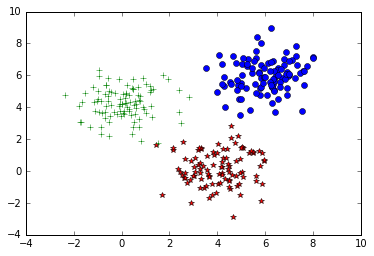

In [33]:
pylab.plot(samples1[:, 0], samples1[:, 1],'*', color = 'red')
pylab.plot(samples2[:, 0], samples2[:, 1],'o',color = 'blue')
pylab.plot(samples3[:, 0], samples3[:, 1],'+',color = 'green')
pylab.show()

In [34]:
from pyspark.mllib.clustering import KMeans, KMeansModel
from numpy import array
from math import sqrt

# Load and parse the data
# NOTE  kmeans_data.txt is available here 
#          https://www.dropbox.com/s/q85t0ytb9apggnh/kmeans_data.txt?dl=0 
data = sc.textFile('data.csv')  
parsedData = data.map(lambda line: array([float(x) for x in line.split(',')]))

In [35]:
#plot centroids and data points for each iteration
def plot_iteration(means):
    pylab.plot(samples1[:, 0], samples1[:, 1], '.', color = 'blue')
    pylab.plot(samples2[:, 0], samples2[:, 1], '.', color = 'blue')
    pylab.plot(samples3[:, 0], samples3[:, 1],'.', color = 'blue')
    pylab.plot(means[0][0], means[0][1],'*',markersize =10,color = 'red')
    pylab.plot(means[1][0], means[1][1],'*',markersize =10,color = 'red')
    pylab.plot(means[2][0], means[2][1],'*',markersize =10,color = 'red')
    pylab.show()

    # Evaluate clustering by computing Within Set Sum of Squared Errors
def error(point, clusters):
    center = clusters.centers[clusters.predict(point)]
    return sqrt(sum([x**2 for x in (point - center)]))


1 Iterations:

Cluster centers: 

	4.11640627,-1.32534773
	2.15521012,5.03511735
	4.87101304,2.09547679
Within Set Sum of Squared Error = 758.441062452


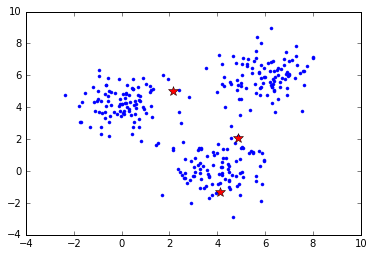


10 Iterations:

Cluster centers: 

	4.04916143,0.16387724
	6.00008142,5.97948160
	0.09506530,4.21958732
Within Set Sum of Squared Error = 375.885589126


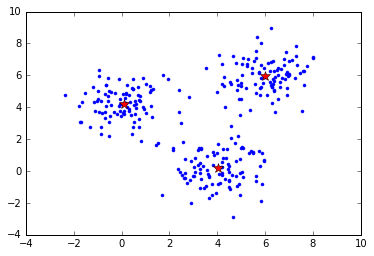


20 Iterations:

Cluster centers: 

	6.00008142,5.97948160
	4.04916143,0.16387724
	0.09506530,4.21958732
Within Set Sum of Squared Error = 375.885589126


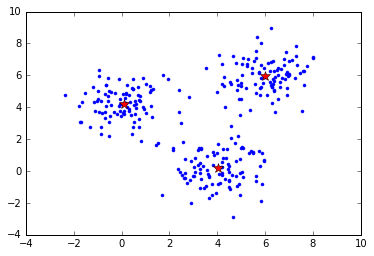


100 Iterations:

Cluster centers: 

	6.00008142,5.97948160
	4.04916143,0.16387724
	0.09506530,4.21958732
Within Set Sum of Squared Error = 375.885589126


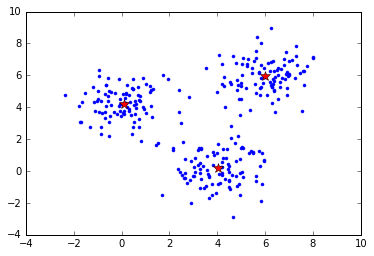

In [36]:
for i in [1,10,20,100]:
    # Build the model (cluster the data)
    clusters = KMeans.train(parsedData, 3, maxIterations=i,
            initializationMode="random")

    print "\n{0} Iterations:\n".format(i)
    print 'Cluster centers: \n'
    for c in clusters.clusterCenters:
        print '\t{0:2.8f},{1:2.8f}'.format(c[0],c[1])
    
    WSSSE = parsedData.map(lambda point: error(point, clusters)).reduce(lambda x, y: x + y)
    print("Within Set Sum of Squared Error = " + str(WSSSE))
    
    plot_iteration(clusters.clusterCenters)

The Within Set Sum of Squared Error converges to its final value within the first 10 iterations. There is no further improvement after the 10th iteration.

## HW 10.4: 

**Using the KMeans code (homegrown code) provided repeat the experiments in HW10.3. Comment on any differences between the results in HW10.3 and HW10.4. Explain.**

In [37]:
import numpy as np

#Calculate which class each data point belongs to
def nearest_centroid(line):
    x = np.array([float(f) for f in line.split(',')])
    closest_centroid_idx = np.sum((x - centroids)**2, axis=1).argmin()
    return (closest_centroid_idx,(x,1))

#plot centroids and data points for each iteration
def plot_iteration(means):
    pylab.plot(samples1[:, 0], samples1[:, 1], '.', color = 'blue')
    pylab.plot(samples2[:, 0], samples2[:, 1], '.', color = 'blue')
    pylab.plot(samples3[:, 0], samples3[:, 1],'.', color = 'blue')
    pylab.plot(means[0][0], means[0][1],'*',markersize =10,color = 'red')
    pylab.plot(means[1][0], means[1][1],'*',markersize =10,color = 'red')
    pylab.plot(means[2][0], means[2][1],'*',markersize =10,color = 'red')
    pylab.show()

Iteration0
[[ 0.59467168  0.8063804 ]
 [ 4.17348094  2.72179691]
 [ 1.752546    5.58021358]]


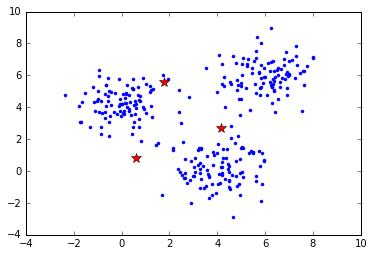

Iteration1
[[ 1.6269627   0.90948466]
 [ 5.36290595  3.09860347]
 [ 1.33618468  5.13344031]]


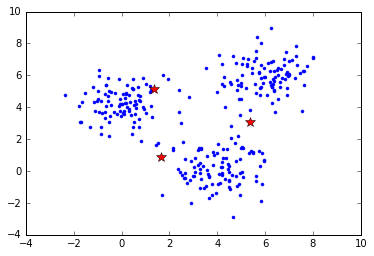

Iteration2
[[ 3.10663118  0.20929783]
 [ 5.83174418  4.65918365]
 [ 0.23081098  4.5494637 ]]


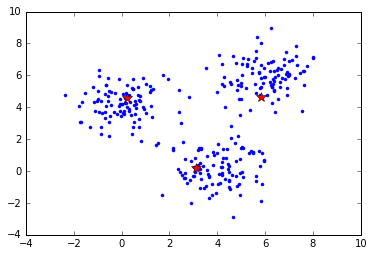

Iteration3
[[ 3.98348644  0.14719222]
 [ 5.97517883  5.9116773 ]
 [ 0.06710426  4.27057789]]


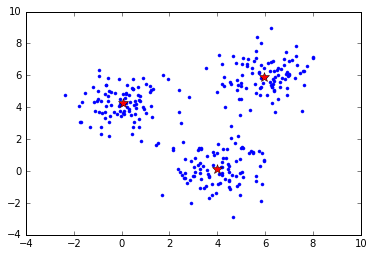

Iteration4
[[ 4.02301719  0.17839295]
 [ 6.00008142  5.9794816 ]
 [ 0.08166858  4.24562871]]


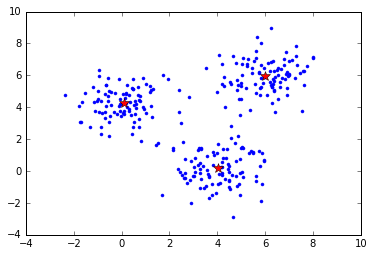

Iteration5
[[ 4.04916143  0.16387724]
 [ 6.00008142  5.9794816 ]
 [ 0.0950653   4.21958732]]


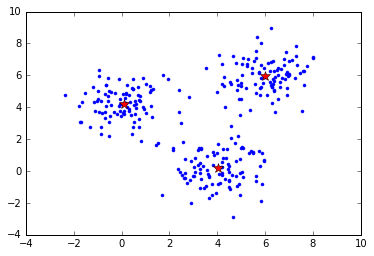

Final Results:
[[ 4.04916143  0.16387724]
 [ 6.00008142  5.9794816 ]
 [ 0.0950653   4.21958732]]


In [38]:
K = 3
# Initialization: initialization of parameter is fixed to show an example
centroids = np.array([[0.0,0.0],[2.0,2.0],[0.0,7.0]])

D = sc.textFile("./data.csv").cache()
iter_num = 0
for i in range(10):  
    res = D.map(nearest_centroid).reduceByKey(lambda x,y : (x[0]+y[0],x[1]+y[1])).collect()
    #res [(0, (array([  2.66546663e+00,   3.94844436e+03]), 1001)  ), 
    #     (2, (array([ 6023.84995923,  5975.48511018]), 1000)), 
    #     (1, (array([ 3986.85984761,    15.93153464]), 999))]
    # res[1][1][1] returns 1000 here
    res = sorted(res,key = lambda x : x[0])  #sort based on clusted ID
    centroids_new = np.array([x[1][0]/x[1][1] for x in res])  #divide by cluster size
    if np.sum(np.absolute(centroids_new-centroids))<0.001:
        break
    print "Iteration" + str(iter_num)
    iter_num = iter_num + 1 
    centroids = centroids_new
    print centroids
    plot_iteration(centroids)
print "Final Results:"
print centroids

The homegrown algorithm seems to converge less quickly to the cluster centers than the MLLib code in 10.3 when judged by looking at the plots. In 10.3 the centers move to very near the cluster centers by the 2nd iteration while it takes an extra iteration or so in the homegrown code. However, this is most likely a result of initial cluster center initialization.

## HW 10.5:  (OPTIONAL)

**Using the KMeans code (homegrown code) provided modify it to do a weighted KMeans and repeat the experiements in HW10.3. Comment on any differences between the results in HW10.3 and HW10.5. Explain.**

**_NOTE: Weight each example as follows using the inverse vector length (Euclidean norm): _**

$weight(X)= \frac{1}{||X||}$, 
where $||X|| = \sqrt{X.X} = \sqrt{(X_{1}^{2} + X_{2}^{2})}$

Here $X$ is vector made up of $X_{1}$ and $X_{2}$.

In [92]:
import numpy as np

#Calculate which class each data point belongs to
def nearest_centroid(line):
    x = np.array([float(f) for f in line.split(',')])
    # the weight is calculated as (1/np.linalg.norm(x))
    closest_centroid_idx = \
        np.sum((1.0/np.linalg.norm(x))*(x - centroids)**2, axis=1).argmin()
    return (closest_centroid_idx,(x,1))

#plot centroids and data points for each iteration
def plot_iteration(means):
    pylab.plot(samples1[:, 0], samples1[:, 1], '.', color = 'blue')
    pylab.plot(samples2[:, 0], samples2[:, 1], '.', color = 'blue')
    pylab.plot(samples3[:, 0], samples3[:, 1],'.', color = 'blue')
    pylab.plot(means[0][0], means[0][1],'*',markersize =10,color = 'red')
    pylab.plot(means[1][0], means[1][1],'*',markersize =10,color = 'red')
    pylab.plot(means[2][0], means[2][1],'*',markersize =10,color = 'red')
    pylab.show()

Iteration0
[[ 0.59467168  0.8063804 ]
 [ 4.17348094  2.72179691]
 [ 1.752546    5.58021358]]


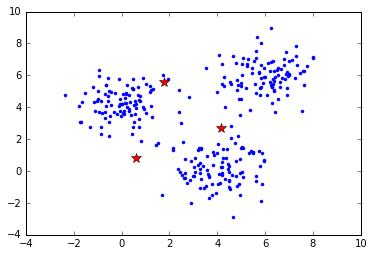

Iteration1
[[ 1.6269627   0.90948466]
 [ 5.36290595  3.09860347]
 [ 1.33618468  5.13344031]]


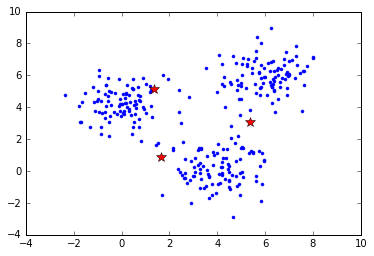

Iteration2
[[ 3.10663118  0.20929783]
 [ 5.83174418  4.65918365]
 [ 0.23081098  4.5494637 ]]


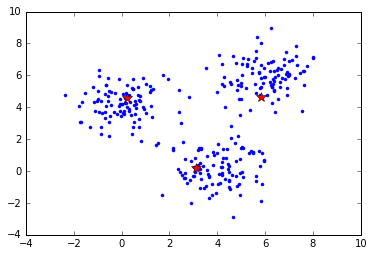

Iteration3
[[ 3.98348644  0.14719222]
 [ 5.97517883  5.9116773 ]
 [ 0.06710426  4.27057789]]


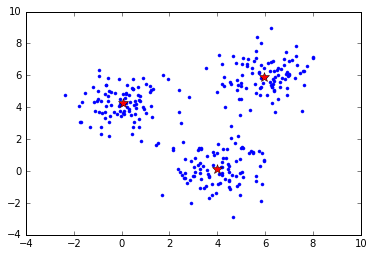

Iteration4
[[ 4.02301719  0.17839295]
 [ 6.00008142  5.9794816 ]
 [ 0.08166858  4.24562871]]


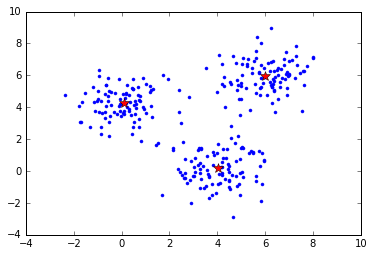

Iteration5
[[ 4.04916143  0.16387724]
 [ 6.00008142  5.9794816 ]
 [ 0.0950653   4.21958732]]


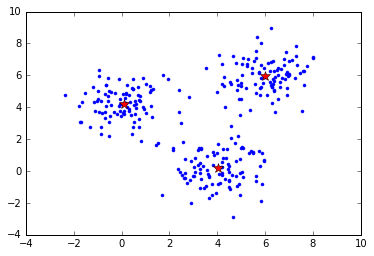

Final Results:
[[ 4.04916143  0.16387724]
 [ 6.00008142  5.9794816 ]
 [ 0.0950653   4.21958732]]


In [39]:
K = 3
# Initialization: initialization of parameter is fixed to show an example
centroids = np.array([[0.0,0.0],[2.0,2.0],[0.0,7.0]])

D = sc.textFile("./data.csv").cache()
iter_num = 0
for i in range(10):  
    res = D.map(nearest_centroid).reduceByKey(lambda x,y : (x[0]+y[0],x[1]+y[1])).collect()
    #res [(0, (array([  2.66546663e+00,   3.94844436e+03]), 1001)  ), 
    #     (2, (array([ 6023.84995923,  5975.48511018]), 1000)), 
    #     (1, (array([ 3986.85984761,    15.93153464]), 999))]
    # res[1][1][1] returns 1000 here
    res = sorted(res,key = lambda x : x[0])  #sort based on clusted ID
    centroids_new = np.array([x[1][0]/x[1][1] for x in res])  #divide by cluster size
    if np.sum(np.absolute(centroids_new-centroids))<0.001:
        break
    print "Iteration" + str(iter_num)
    iter_num = iter_num + 1 
    centroids = centroids_new
    print centroids
    plot_iteration(centroids)
print "Final Results:"
print centroids

# HW 10.6: Linear Regression  (OPTIONAL)

### HW 10.6.1

** Using the following linear regression notebook:**

 https://www.dropbox.com/s/atzqkc0p1eajuz6/LinearRegression-Notebook-Challenge.ipynb?dl=0 

**Generate 2 sets of data with 100 data points using the data generation code provided and plot each in separate plots. Call one the training set and the other the testing set.**

**Using MLLib's LinearRegressionWithSGD train up a linear regression model with the training dataset and evaluate with the testing set. What a good number of iterations for training the linear regression model? Justify with plots and words. **

#### Data Generation

In [62]:
import numpy as np
from pyspark.mllib.regression import LabeledPoint, LinearRegressionWithSGD
import csv
def data_generate(fileName, w=[0,0], size=100, seed=0):
    # accept an integer random seed as a parameter to facilitate
    # the generation of difference data sets
    np.random.seed(seed)
    x = np.random.uniform(-4, 4, size)
    noise = np.random.normal(0, 2, size)
    y = (x * w[0] + w[1] + noise)
    data = zip(y, x)
    with open(fileName,'wb') as f:
        writer = csv.writer(f)
        for row in data:
            writer.writerow(row)
    return True

Generate a test data set and a train data set. Here we use the same data generation function and parameters twice to generate the train and test data.

In [63]:
w = [8,-2]
data_generate('data_train.csv', w, 100, 123)
data_generate('data_test.csv', w, 100, 456)

True

The true $y = 8x - 2$.

#### Data Visualization

In [64]:
%matplotlib inline
import matplotlib.pyplot as plt
def dataPlot(file, w, title):
    with open(file, 'r') as f:
        reader = csv.reader(f)
        for row in reader:
            plt.plot(float(row[1]), float(row[0]),'o'+'r')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(title)
    x = [-4, 4]
    y = [(i * w[0] + w[1]) for i in x]
    plt.plot(x,y, linewidth=2.0, )
    plt.grid()
    plt.show()

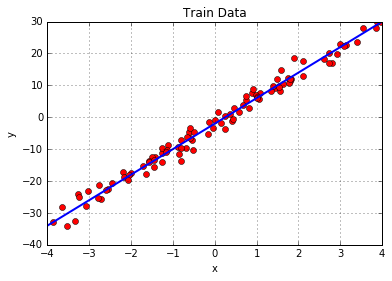

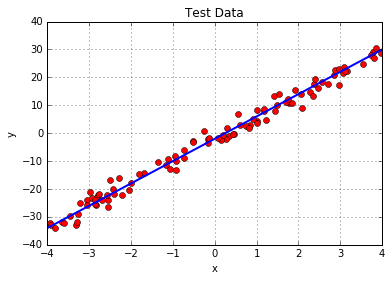

In [65]:
dataPlot('data_train.csv',w, 'Train Data')
dataPlot('data_test.csv',w, 'Test Data')

In [56]:
def iterationsPlot(testFile, trainFile, w):
    x = [-4, 4]
    
    y = [(i * w[0] + w[1]) for i in x]

    plt.figure(figsize=(10,10))
    plt.plot(x, y, 'k', label="True line", linewidth=2.0)

    test_data = sc.textFile(testFile). \
        map(lambda line: [float(v) for v in line.split(',')]).cache()
    
    train_data = sc.textFile(trainFile). \
        map(lambda line: [float(v) for v in line.split(',')]). \
        map(lambda point: LabeledPoint(point[0],[point[1]])).cache()

    n = train_data.count()
    
    np.random.seed(400)
    w = np.random.normal(0,1,2)
    y = [(i * w[0] + w[1]) for i in x]
    plt.plot(x, y, 'r--', label="After 0 Iterations", linewidth=2.0)
    
    squared_error = test_data.map(lambda d: (d[0] - np.dot(w, [d[1],1.0]))**2).reduce(lambda a, b: a + b)
    print "Mean Squared Error after 0 iterations: " + str(squared_error/n)
    
    lrm = LinearRegressionWithSGD.train(train_data, iterations=2,
        initialWeights=array([1.0]))    

    y = [lrm.predict([i]) for i in x]
    plt.plot(x, y, 'b--', label="After 2 Iterations", linewidth=2.0)
    squared_error = test_data.map(lambda d: (d[0] - lrm.predict([d[1]]))**2).reduce(lambda a, b: a + b)
    print "Mean Squared Error after 2 iterations: " + str(squared_error/n)
    
    lrm = LinearRegressionWithSGD.train(train_data, iterations=4,
        initialWeights=array([1.0]))    

    y = [lrm.predict([i]) for i in x]
    plt.plot(x, y, 'c--', label="After 4 Iterations", linewidth=2.0)
    squared_error = test_data.map(lambda d: (d[0] - lrm.predict([d[1]]))**2).reduce(lambda a, b: a + b)
    print "Mean Squared Error after 4 iterations: " + str(squared_error/n)
    
    lrm = LinearRegressionWithSGD.train(train_data, iterations=6,
        initialWeights=array([1.0]))    

    y = [lrm.predict([i]) for i in x]
    plt.plot(x, y, 'y--', label="After 6 Iterations", linewidth=2.0)
    squared_error = test_data.map(lambda d: (d[0] - lrm.predict([d[1]]))**2).reduce(lambda a, b: a + b)
    print "Mean Squared Error after 6 iterations: " + str(squared_error/n)

    lrm = LinearRegressionWithSGD.train(train_data, iterations=8,
        initialWeights=array([1.0]))    

    y = [lrm.predict([i]) for i in x]
    plt.plot(x, y, 'm--', label="After 8 Iterations", linewidth=2.0)
    squared_error = test_data.map(lambda d: (d[0] - lrm.predict([d[1]]))**2).reduce(lambda a, b: a + b)
    print "Mean Squared Error after 8 iterations: " + str(squared_error/n)

    lrm = LinearRegressionWithSGD.train(train_data, iterations=10,
        initialWeights=array([1.0]))    

    y = [lrm.predict([i]) for i in x]
    plt.plot(x, y, 'r-.', label="After 10 Iterations", linewidth=2.0)
    squared_error = test_data.map(lambda d: (d[0] - lrm.predict([d[1]]))**2).reduce(lambda a, b: a + b)
    print "Mean Squared Error after 10 iterations: " + str(squared_error/n)

    lrm = LinearRegressionWithSGD.train(train_data, iterations=12,
        initialWeights=array([1.0]))    

    y = [lrm.predict([i]) for i in x]
    plt.plot(x, y, 'g:', label="After 12 Iterations", linewidth=2.0)
    squared_error = test_data.map(lambda d: (d[0] - lrm.predict([d[1]]))**2).reduce(lambda a, b: a + b)
    print "Mean Squared Error after 12 iterations: " + str(squared_error/n)



    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, fontsize=20, borderaxespad=0.)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid()
    plt.show()

Mean Squared Error after 0 iterations: 449.275905508
Mean Squared Error after 2 iterations: 6222.20739503
Mean Squared Error after 4 iterations: 8019.21717965
Mean Squared Error after 6 iterations: 1383.28058198
Mean Squared Error after 8 iterations: 45.5641860988
Mean Squared Error after 10 iterations: 8.72309274795
Mean Squared Error after 12 iterations: 8.62919896004


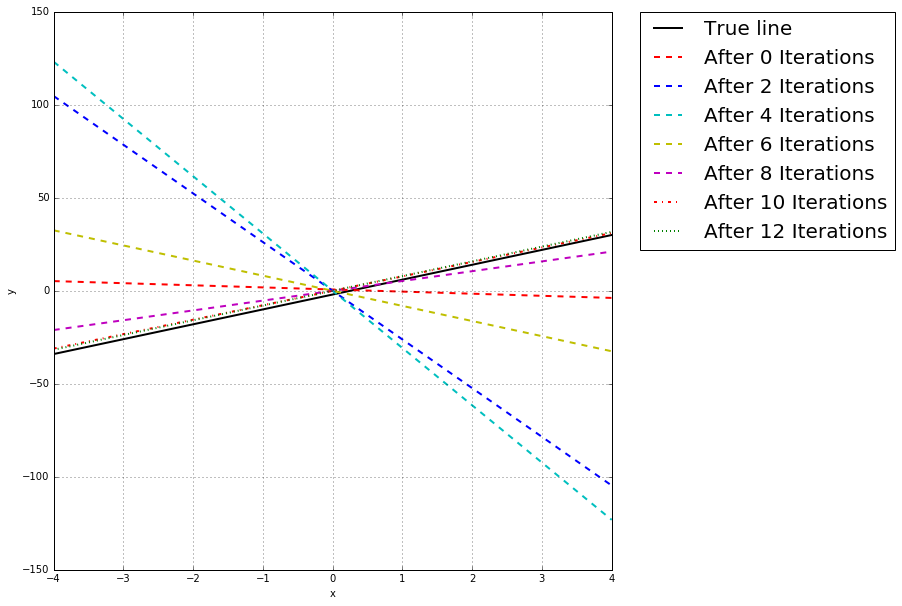

In [57]:
iterationsPlot('data_test.csv', 'data_train.csv',w = [8,-2])

The MLlib linear regression module converges on the test set after training on the training set for about 10 iterations. There doesn't seem to be much improvement after the 10th iteration.

## HW 10.6.2

**In the notebook provided, in the cell labeled "Gradient descent (regularization)".**

**Fill in the blanks and get this code to work for LASS0 and RIDGE linear regression.**

**Using the data from 10.6.1 tune the hyper parameters of your LASS0 and RIDGE regression. Report your findings with words and plots.**


In [103]:
def linearRegressionGDReg(data, wInitial=None, learningRate=0.05, iterations=50, regParam=0.01, regType=None):
    featureLen = len(data.take(1)[0])-1
    n = data.count()
    if wInitial is None:
        w = np.random.normal(size=featureLen) # w should be broadcasted if it is large
    else:
        w = wInitial
    for i in range(iterations):
        wBroadcast = sc.broadcast(w)
        gradient = data.map(lambda d: -2 * (d[0] - np.dot(wBroadcast.value, d[1:])) * np.array(d[1:])) \
                    .reduce(lambda a, b: a + b)
        if regType == "Ridge":
            #ridge is sum(parameters**2)
            wReg = np.square(w)
            
        elif regType == "Lasso":
            #lasso is sum(abs(parameters))
            wReg = np.abs(w)
        else:
            wReg = np.zeros(w.shape[0])
        gradient = gradient + regParam * wReg  #gradient:  GD of Sqaured Error+ GD of regularized term 
        w = w - learningRate * gradient / n
    return w

SGD  [ 7.92701601]
SGD Ridge  [ 7.92620088]
SGD Lasso  [ 7.92691316]


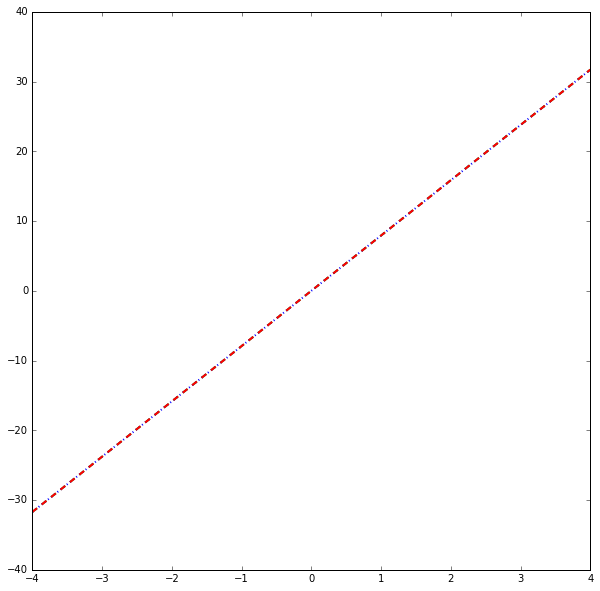

In [131]:
data = sc.textFile("./data_train.csv"). \
    map(lambda line: [float(v) for v in line.split(',')]).cache()

np.random.seed(400)
plt.figure(figsize=(10,10))
    
beta_hat = linearRegressionGDReg(data, iterations=50, regParam=0.1, regType="")
print 'SGD ',beta_hat
y = [beta_hat[0]*i for i in x]
plt.plot(x, y, 'g--', label="", linewidth=2.0)

beta_hat = linearRegressionGDReg(data, iterations=50, regParam=0.01, regType="Ridge")
print 'SGD Ridge ',beta_hat
y = [beta_hat[0]*i for i in x]
plt.plot(x, y, 'b:', label="", linewidth=2.0)

beta_hat = linearRegressionGDReg(data, iterations=50, regParam=0.01, regType="Lasso")
print 'SGD Lasso ',beta_hat
y = [beta_hat[0]*i for i in x]
plt.plot(x, y, 'r--', label="", linewidth=2.0)


In [106]:
np.random.seed(400)
linearRegressionGDReg(data, iterations=50, regParam=0.1, regType="Lasso")

array([ 7.92598764])

(weights=[7.93297544657], intercept=-1.9291504553545304)
(weights=[7.91242675855], intercept=-1.909852379336442)
(weights=[7.93035046639], intercept=-1.9191237277230135)


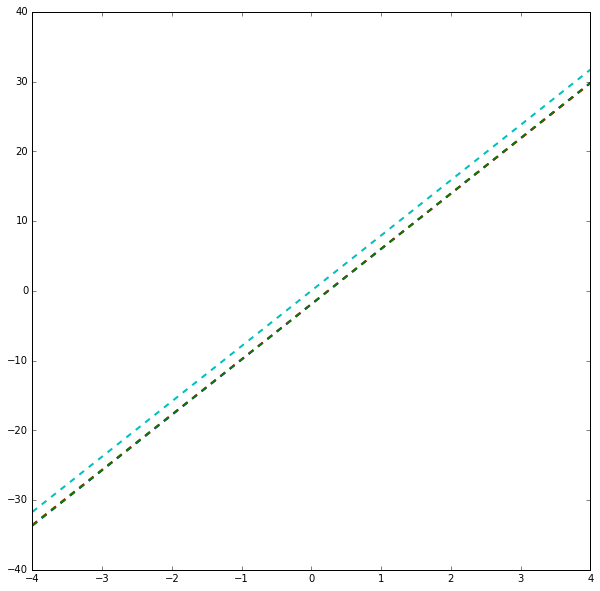

In [128]:
from pyspark.mllib.regression import LabeledPoint, LinearRegressionWithSGD, LinearRegressionModel

# Load and parse the data
def parsePoint(line):
    values = [float(x) for x in line.split(',')]
    return LabeledPoint(values[0], values[1:])

data = sc.textFile("data_train.csv")
parsedData = data.map(parsePoint)

x = [-4, 4]
plt.figure(figsize=(10,10))

# Build the model
model = LinearRegressionWithSGD.train(parsedData, intercept=True, iterations=50)
y = [model.predict([i]) for i in x]
plt.plot(x, y, 'b--', label="Linear Regression SGD", linewidth=2.0)
print model

model_ridge = LinearRegressionWithSGD.train(parsedData, regType="l2", regParam=0.01, intercept=True)
y = [model_ridge.predict([i]) for i in x]
plt.plot(x, y, 'r--', label="Linear Regression Ridge", linewidth=2.0)
print model_ridge

model_lasso = LinearRegressionWithSGD.train(parsedData, regType="l1", regParam=0.01, intercept=True)
y = [model_lasso.predict([i]) for i in x]
plt.plot(x, y, 'g--', label="Linear Regression Lasso", linewidth=2.0)
print model_lasso

# Plot the homegrown SGD Lasso on top of the MLLib SGD plots
y = [beta_hat[0]*i for i in x]
plt.plot(x, y, 'c--', label="", linewidth=2.0)

The "homegrown" stochastic gradient descent (SGD) algorithm converges more closely between the 3 different regularization types, but does not produce an intercept estimate. The coefficients between them are slightly different but not enough so that you can tell by eye in the graph.

The MLLib SGD algorithms have slight differences between them with the same number of iterations as can be see in the graph, mainly the Ridge regression is very different from the Lasso no OLS regularization. Modifying the regularization weight hyperparameter from 0.1 to 0.01 helps to minimize the difference.